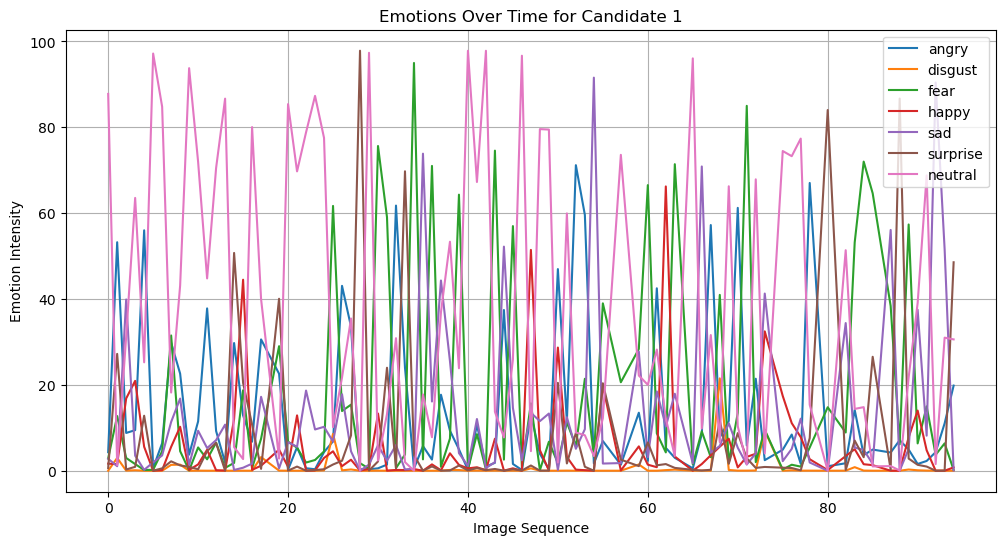

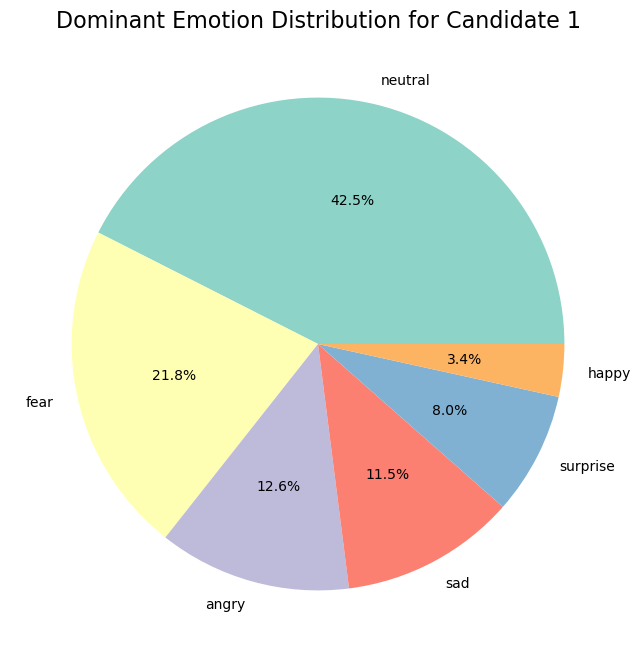

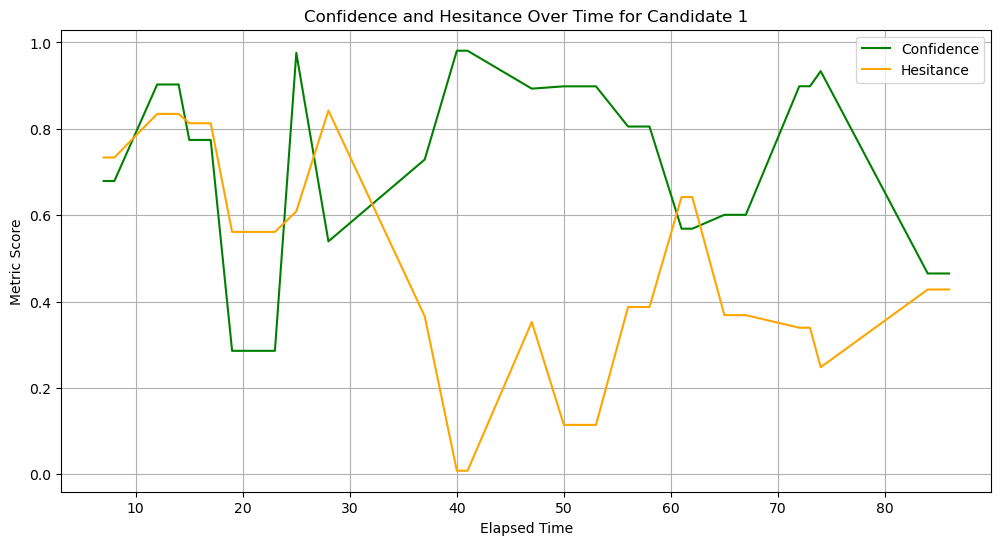

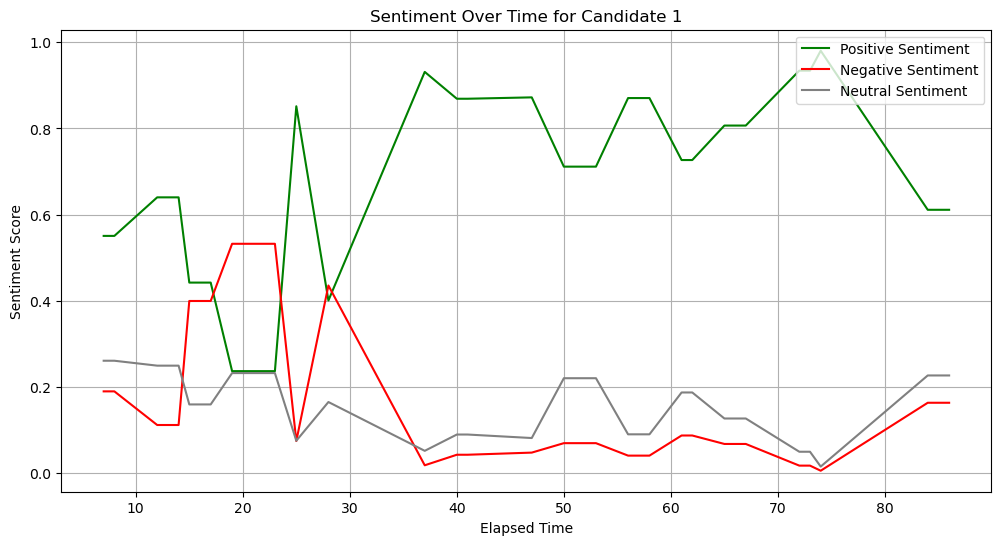

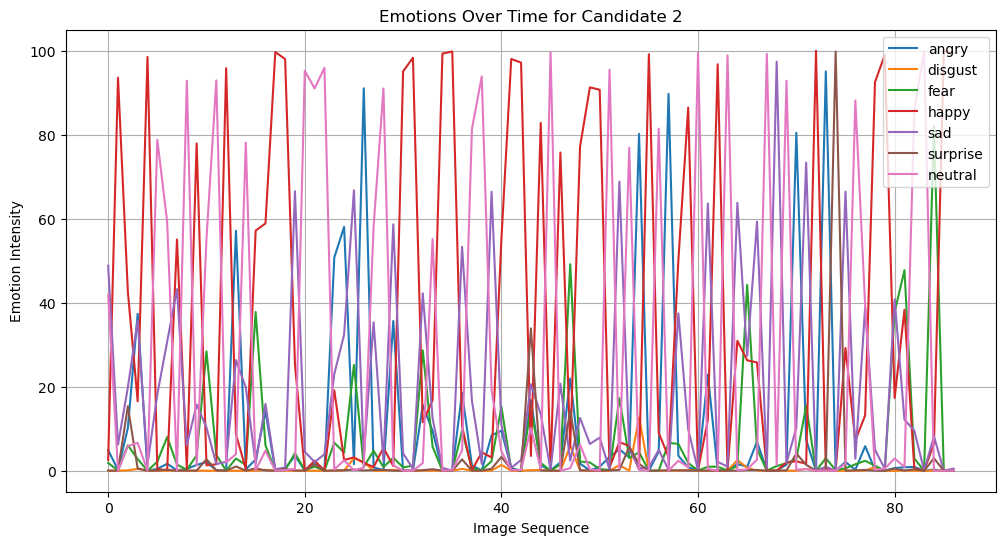

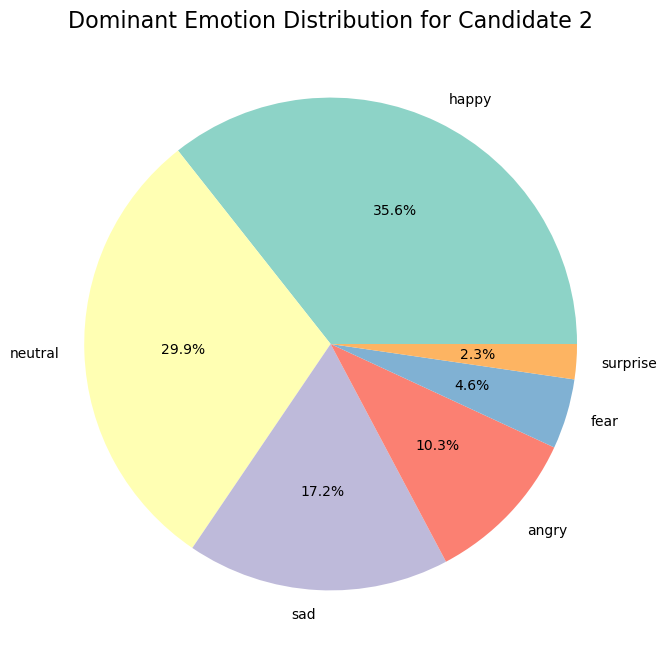

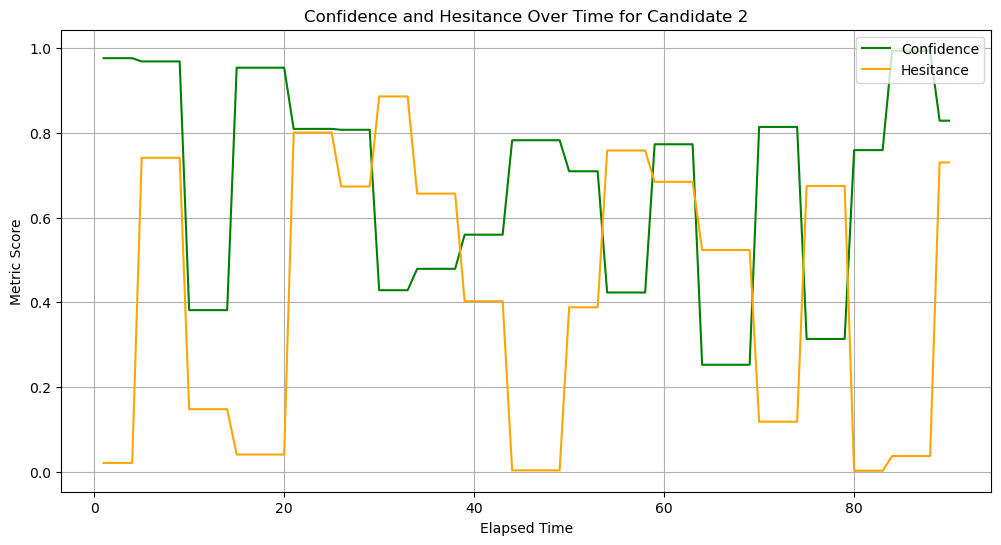

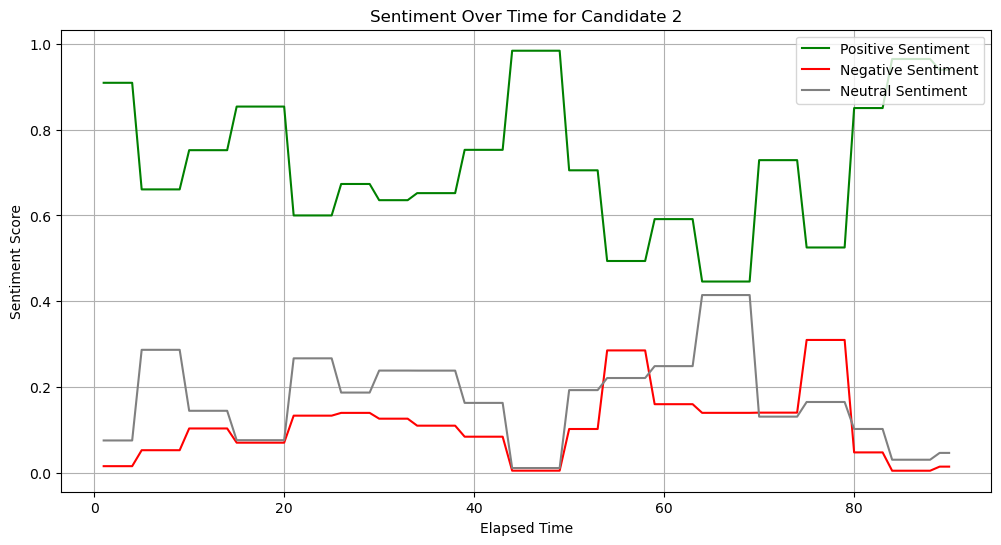

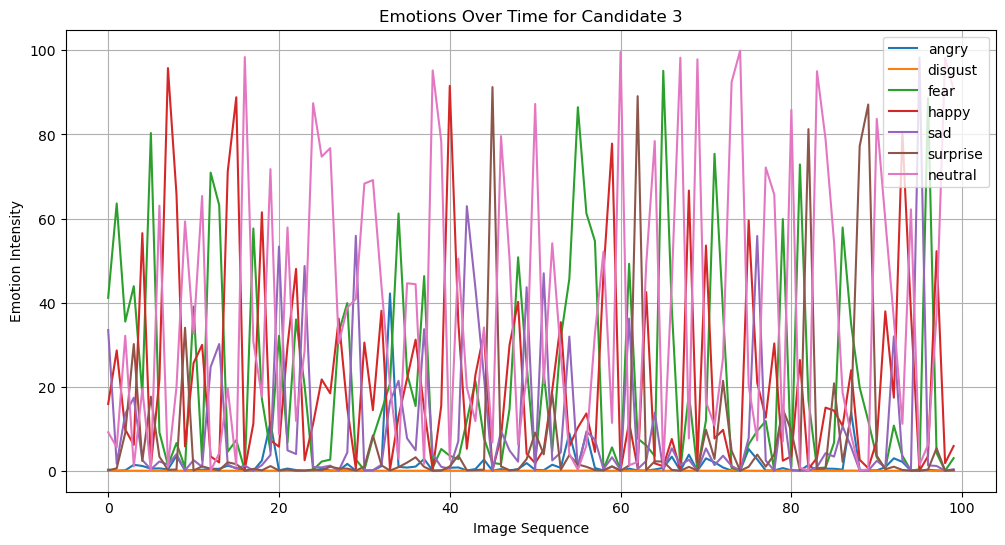

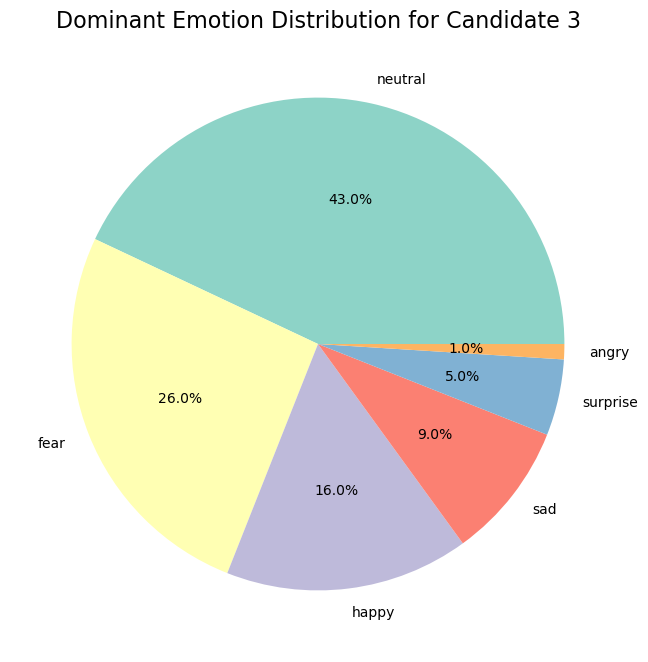

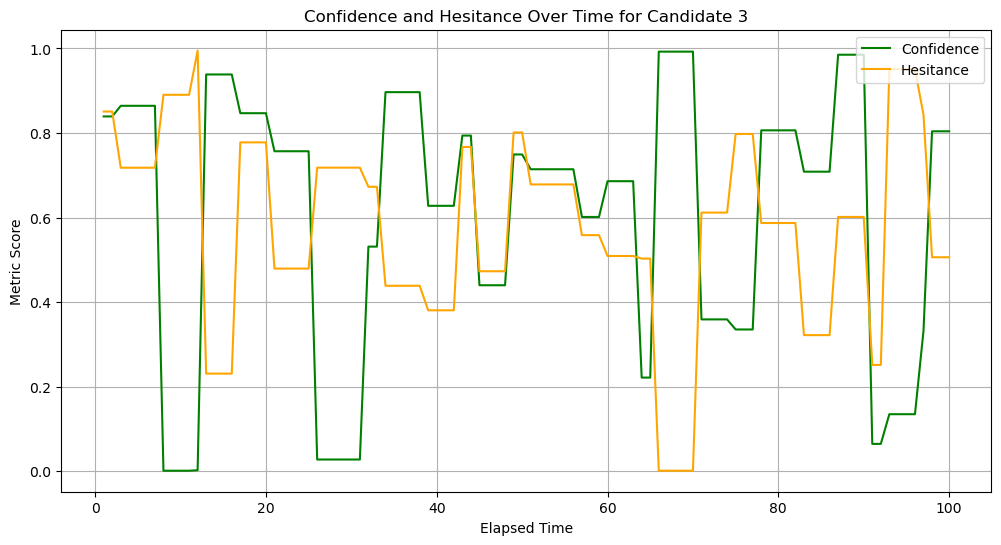

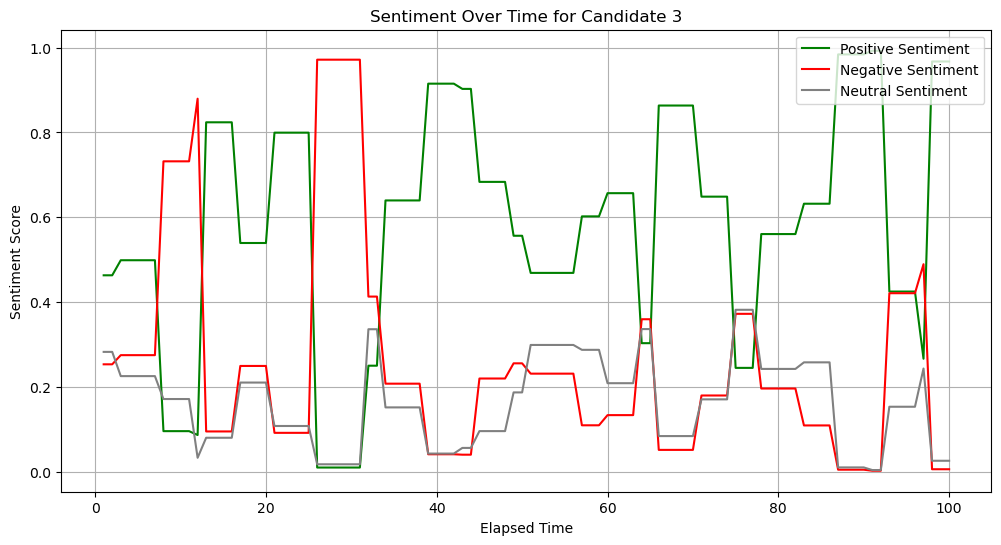

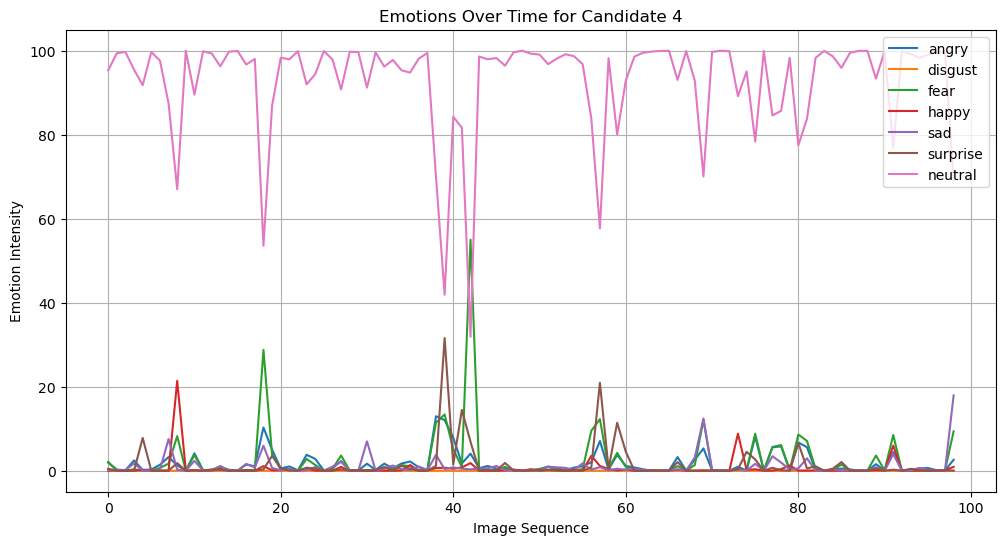

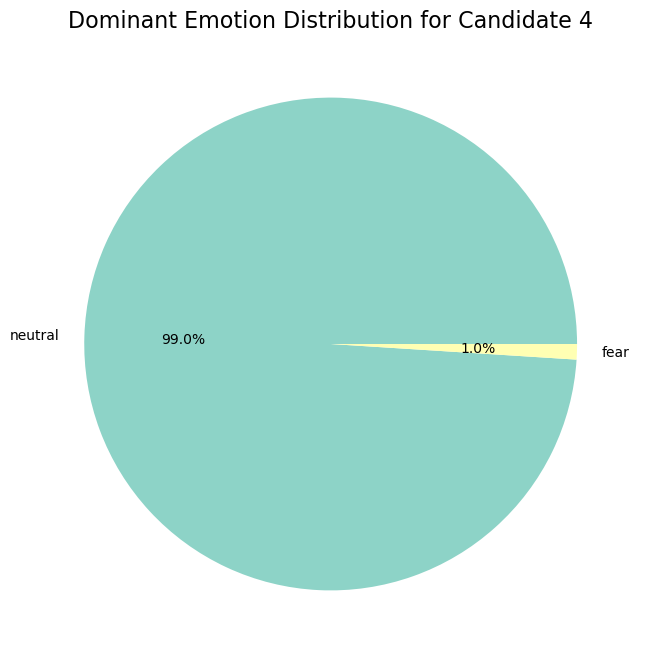

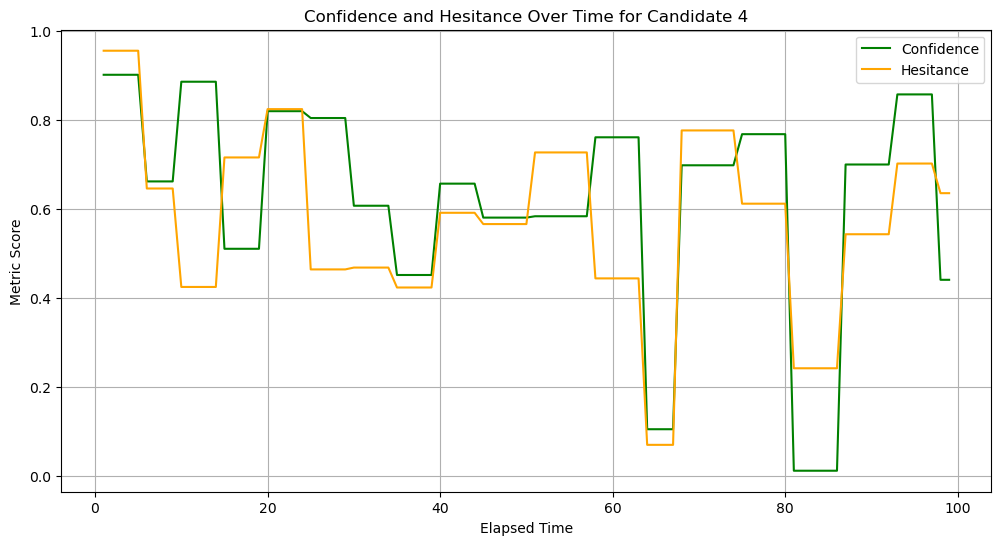

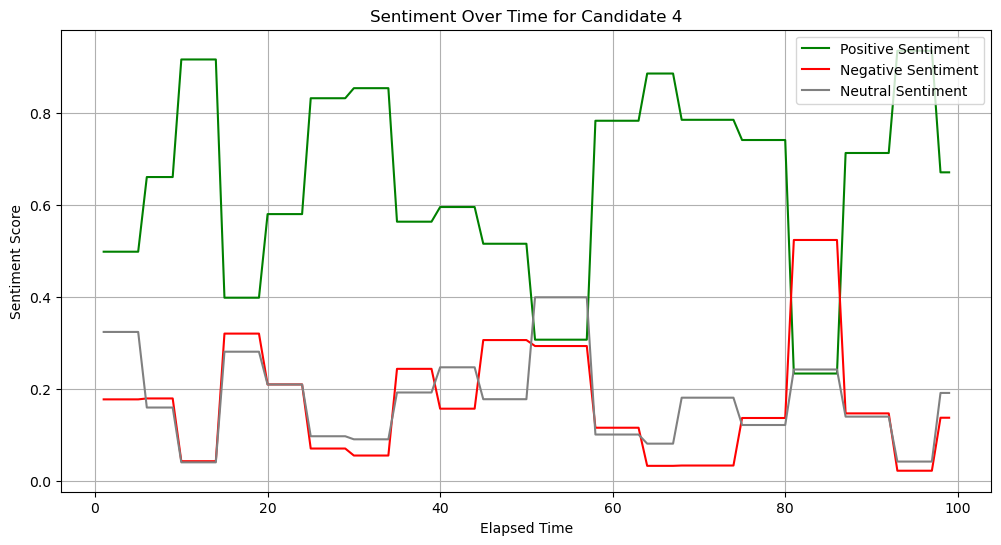

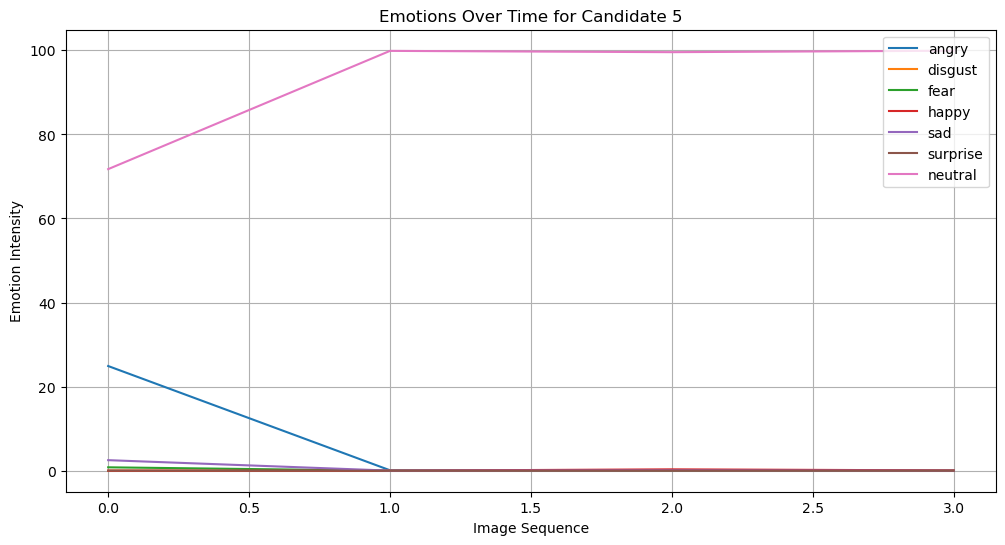

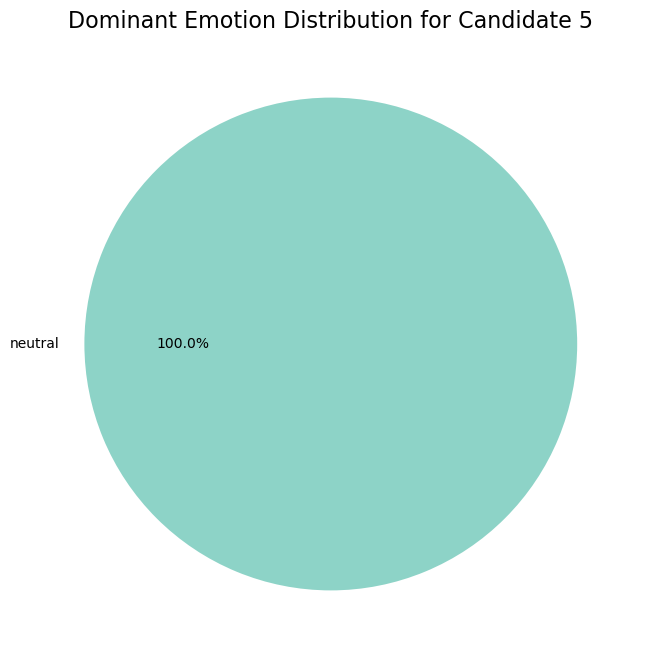

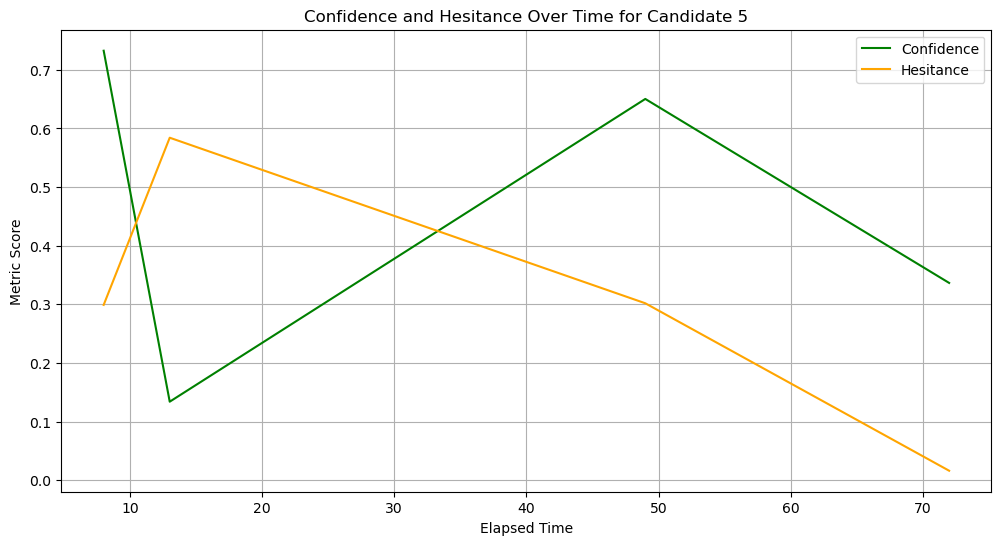

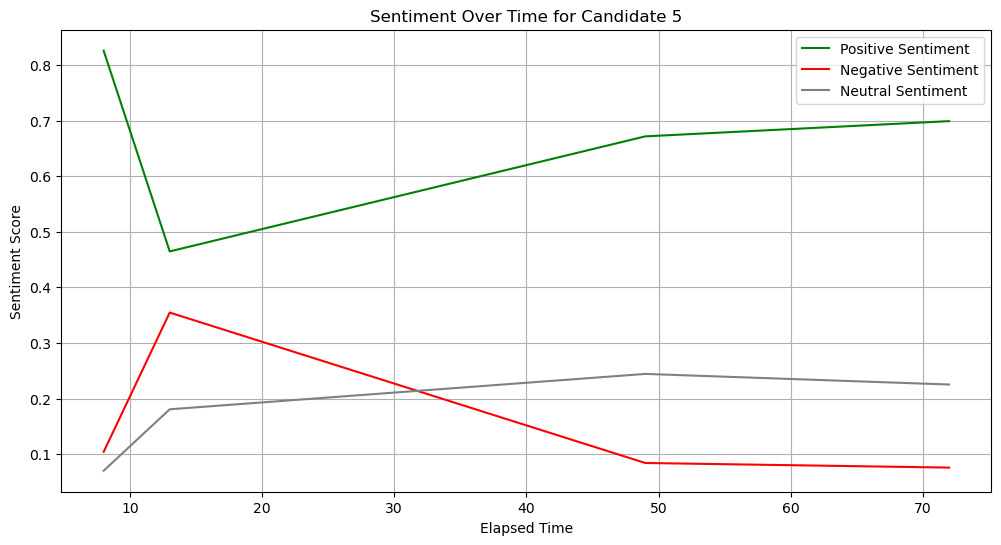

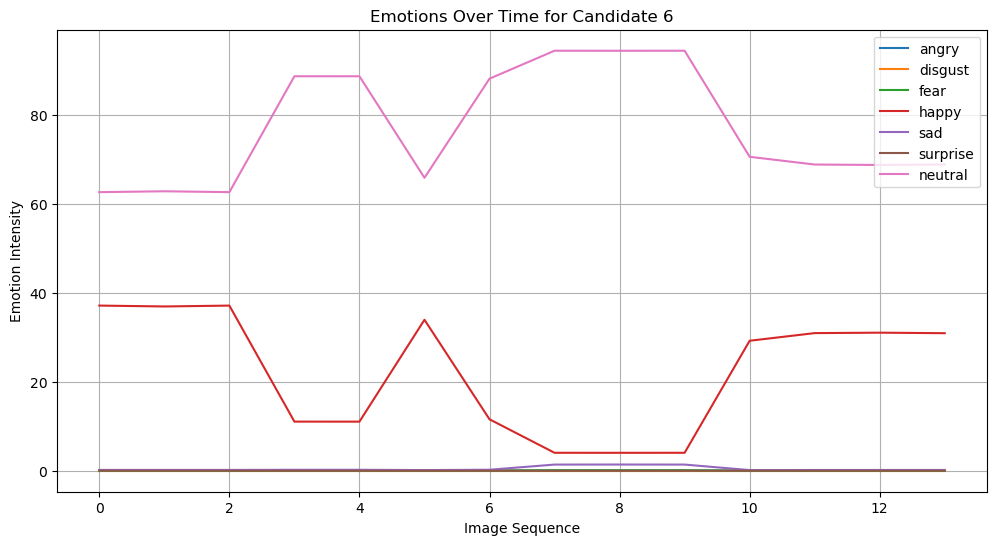

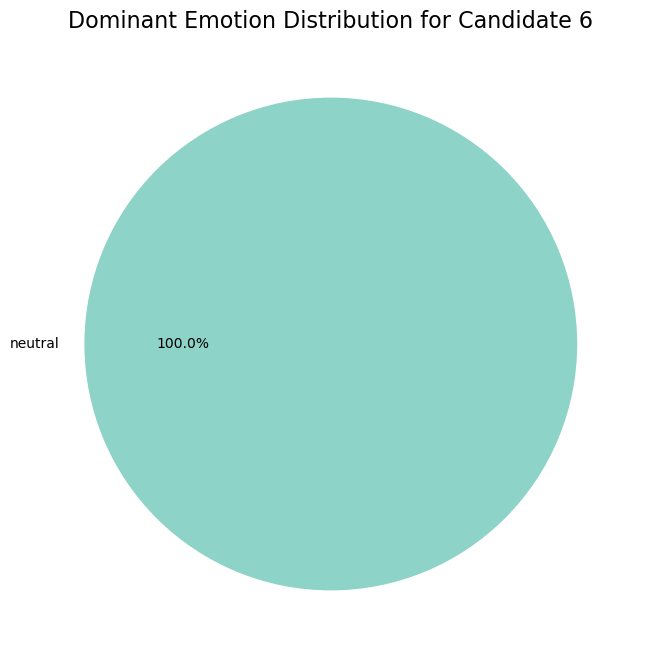

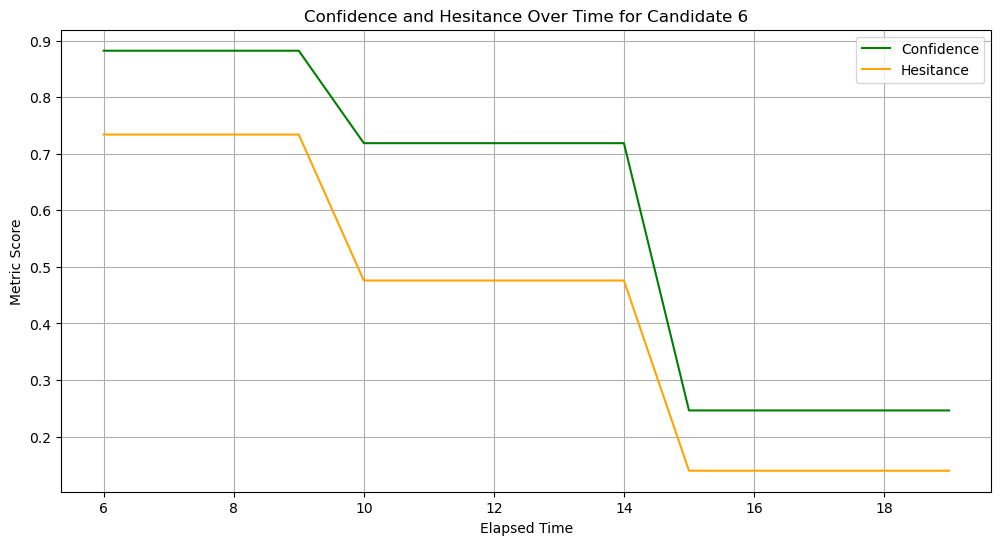

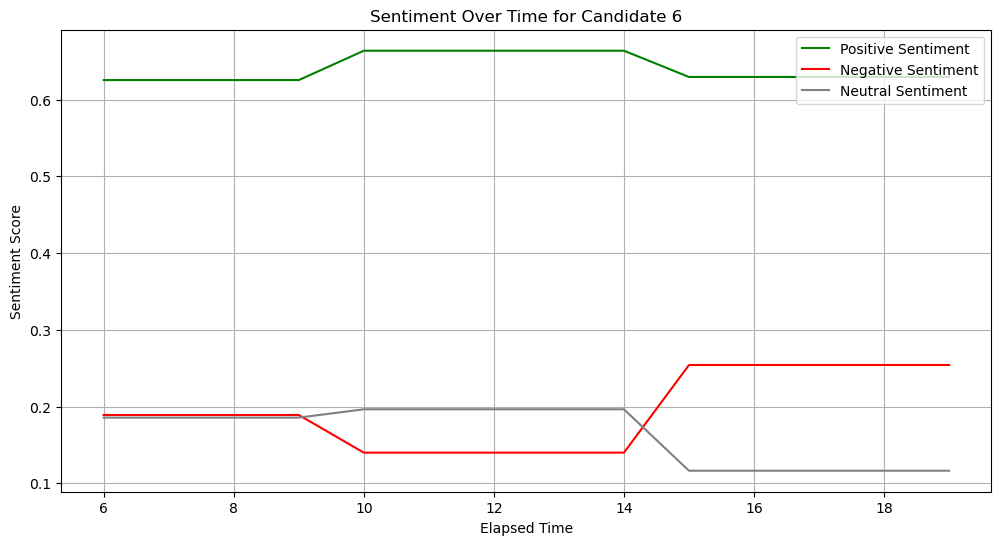

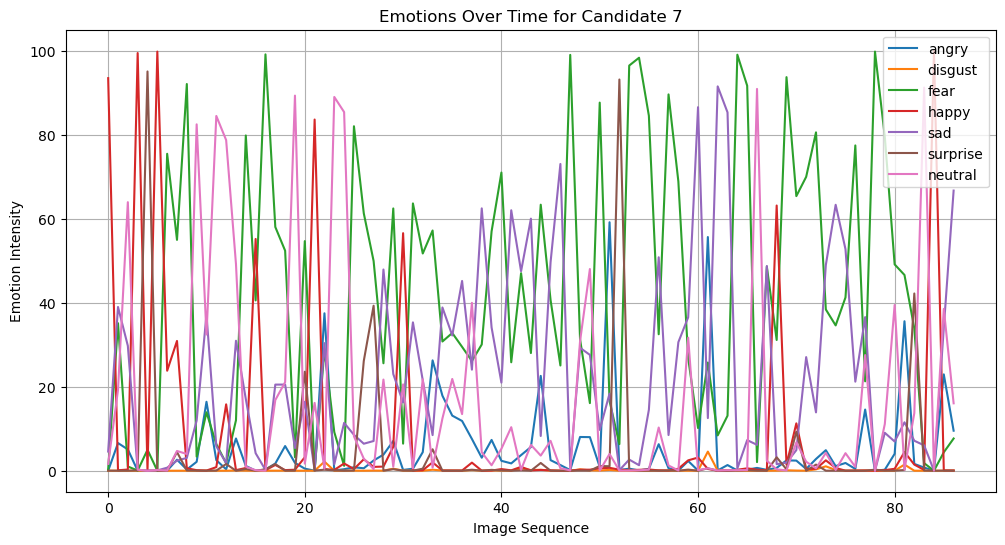

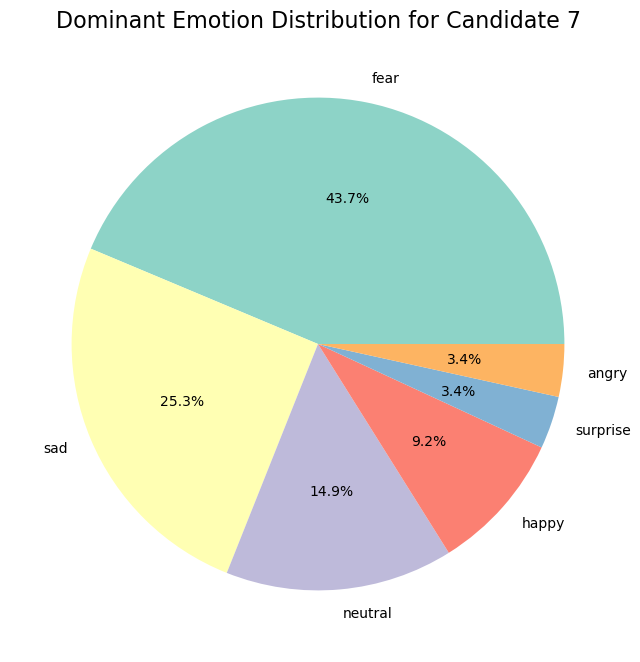

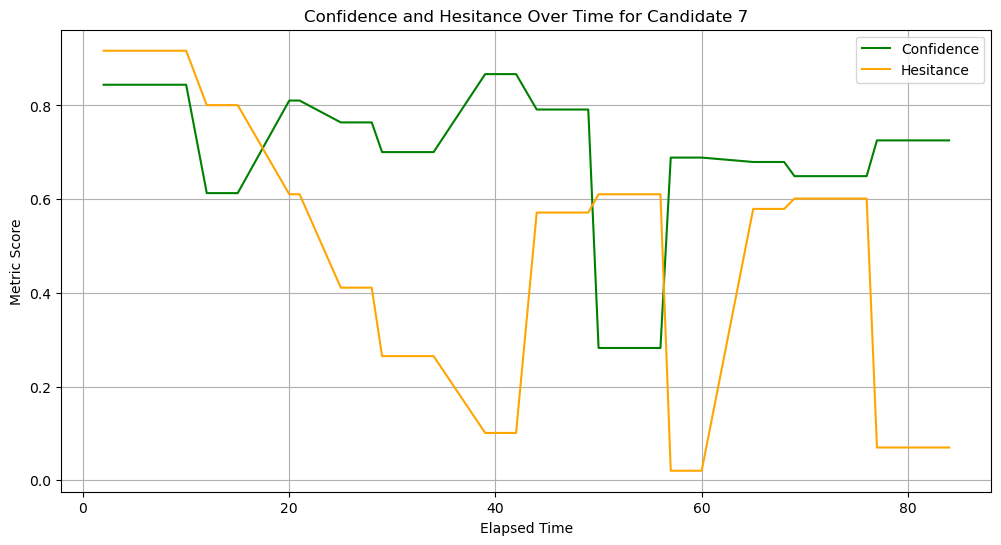

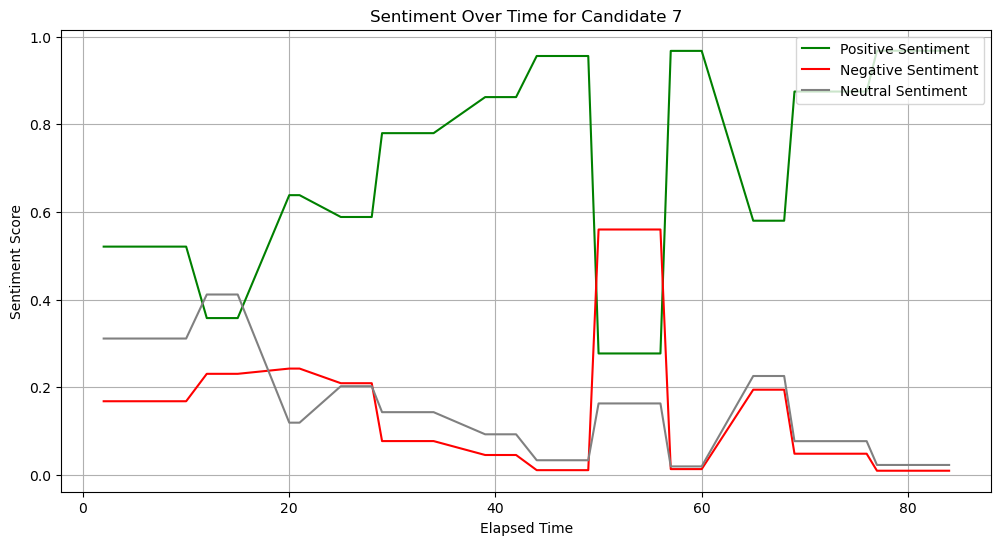

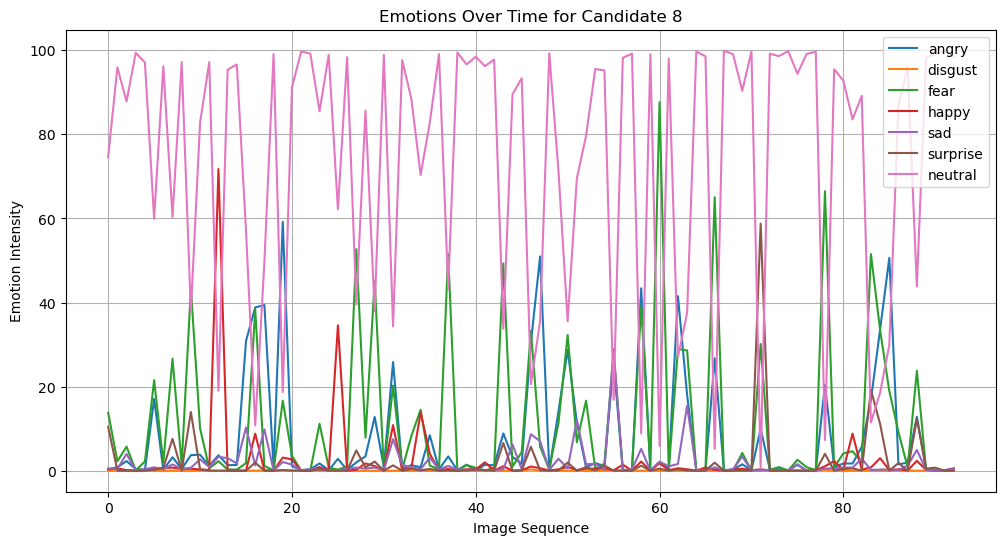

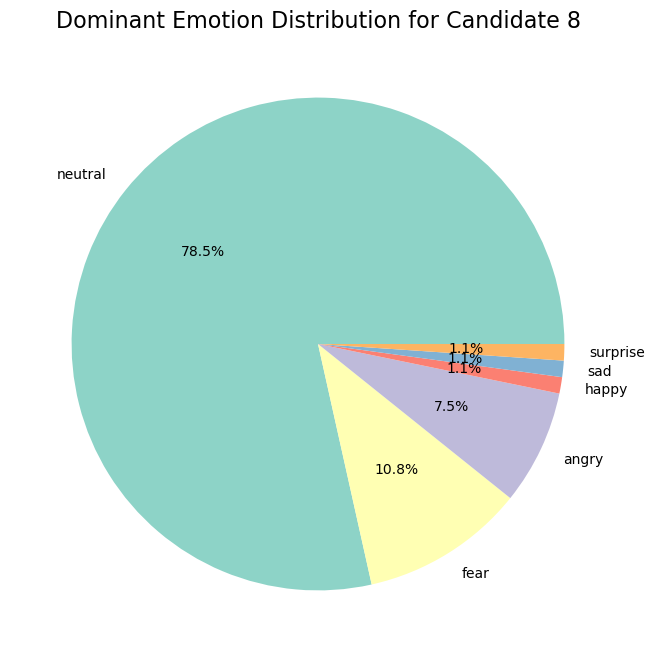

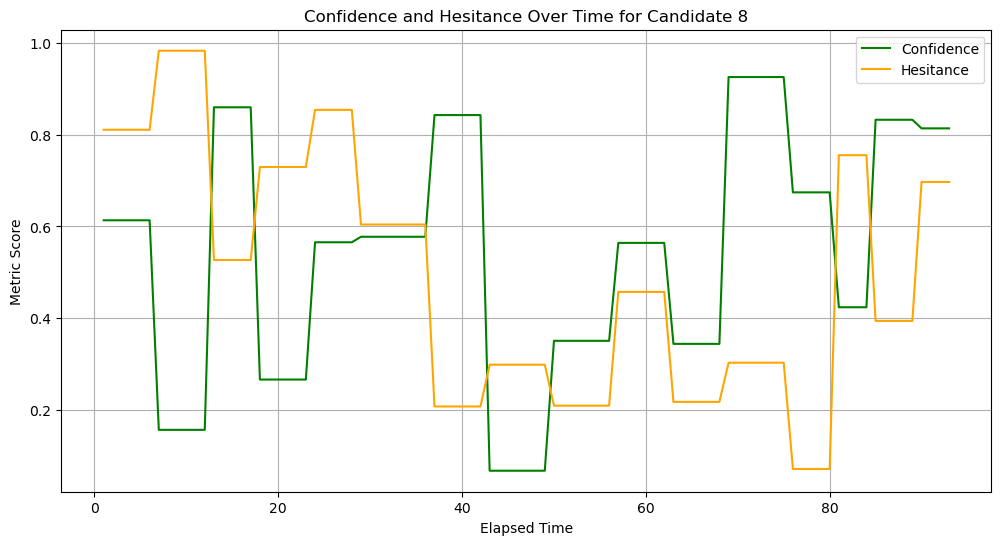

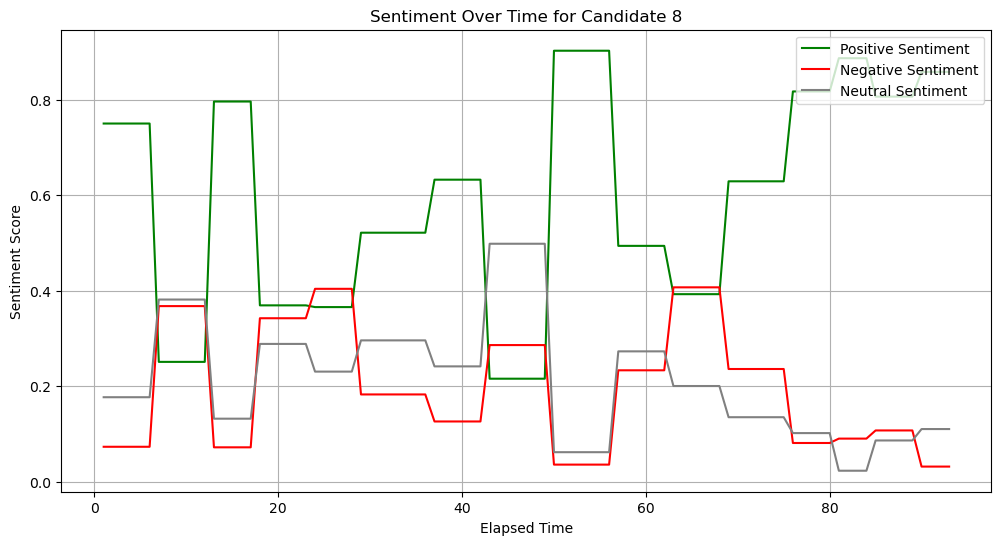

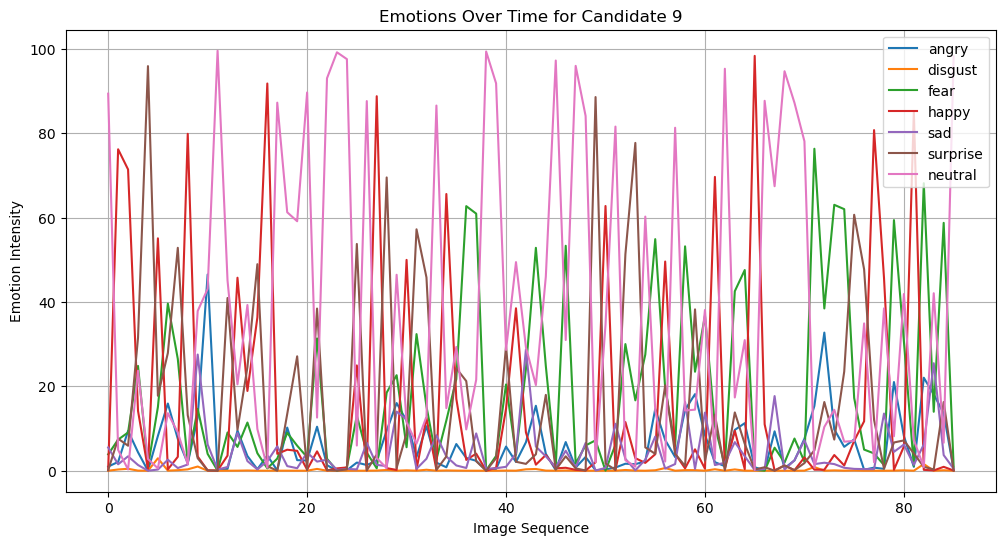

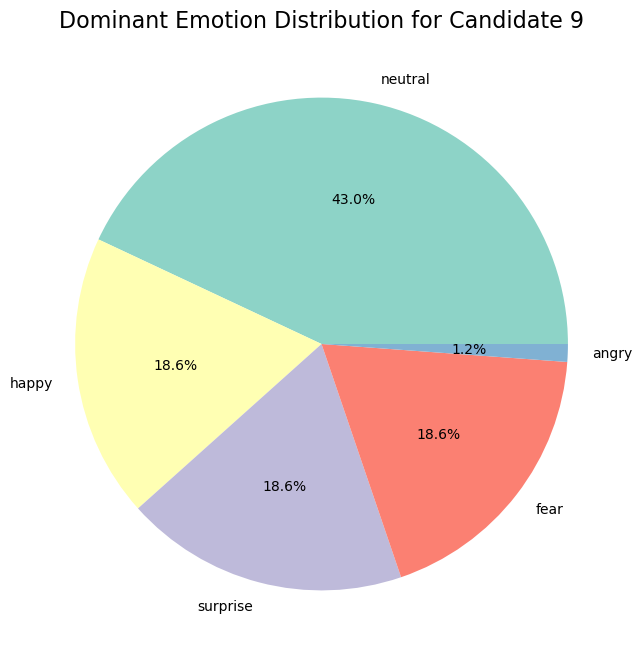

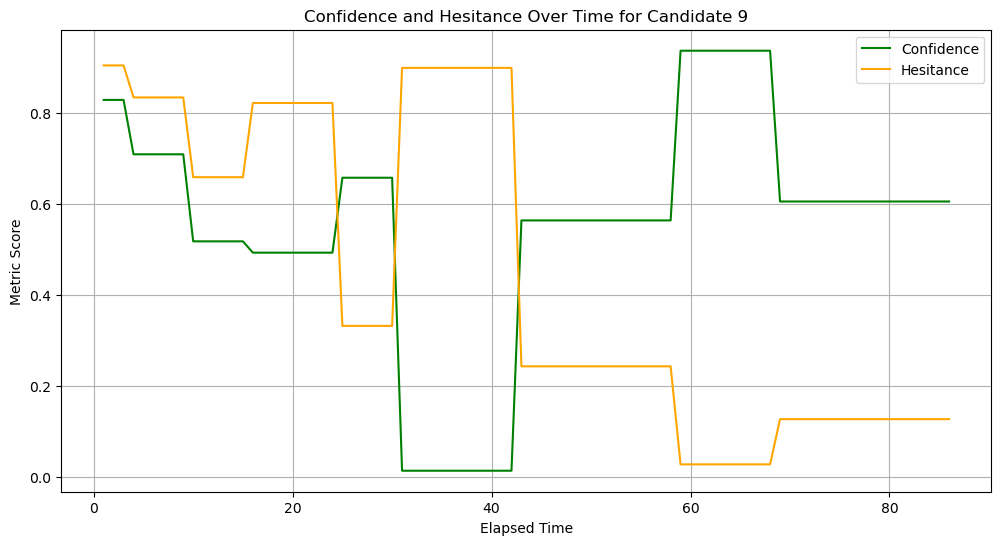

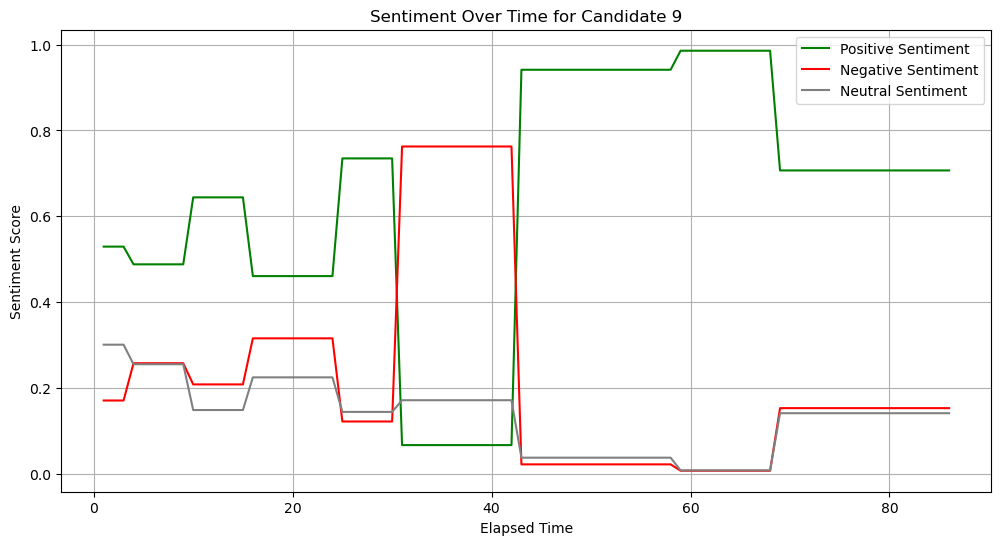

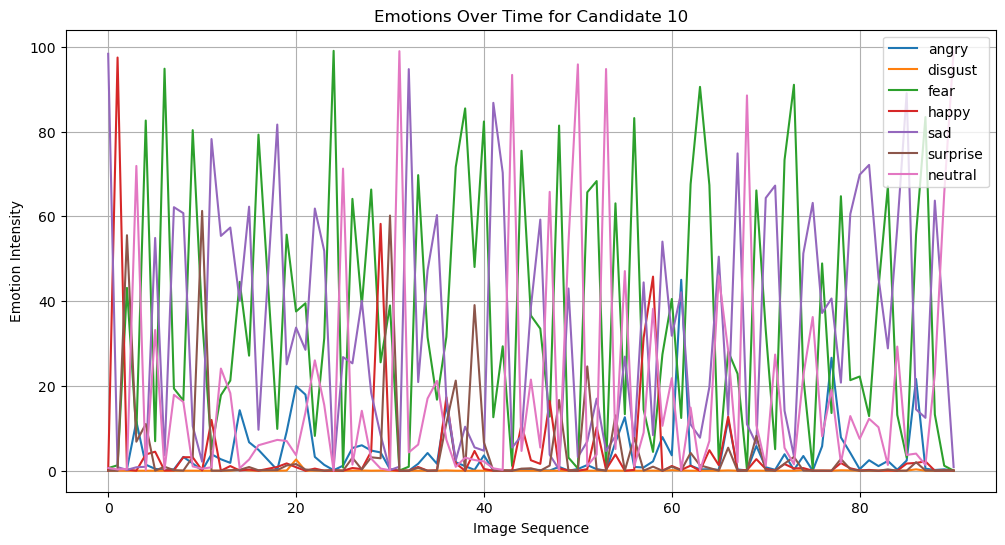

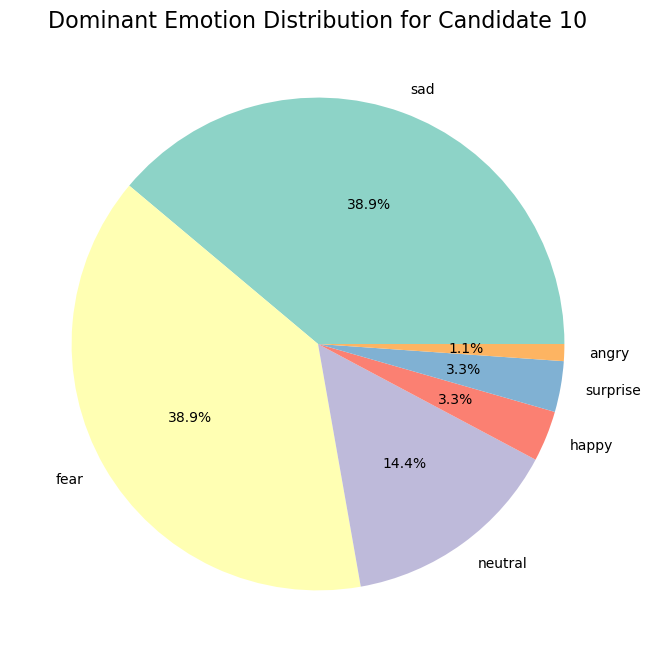

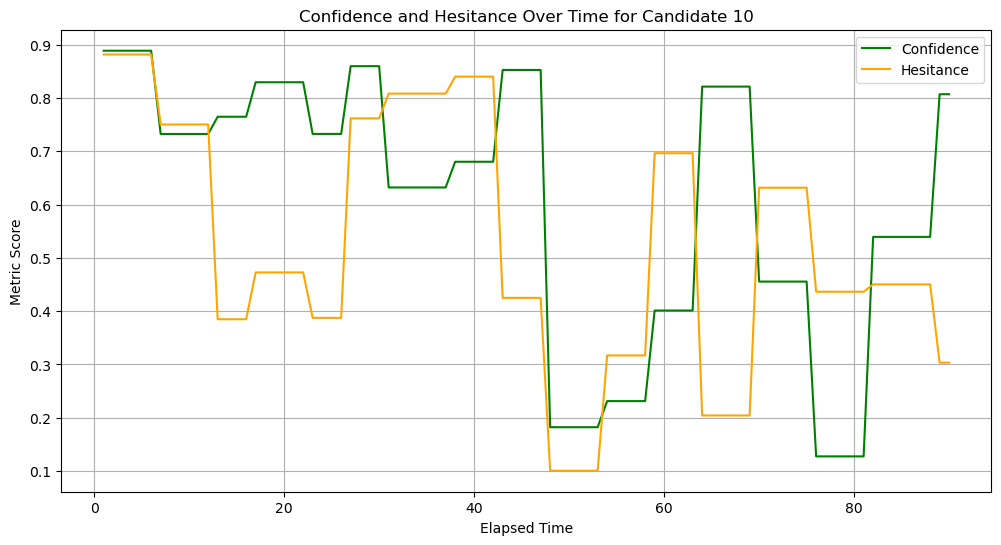

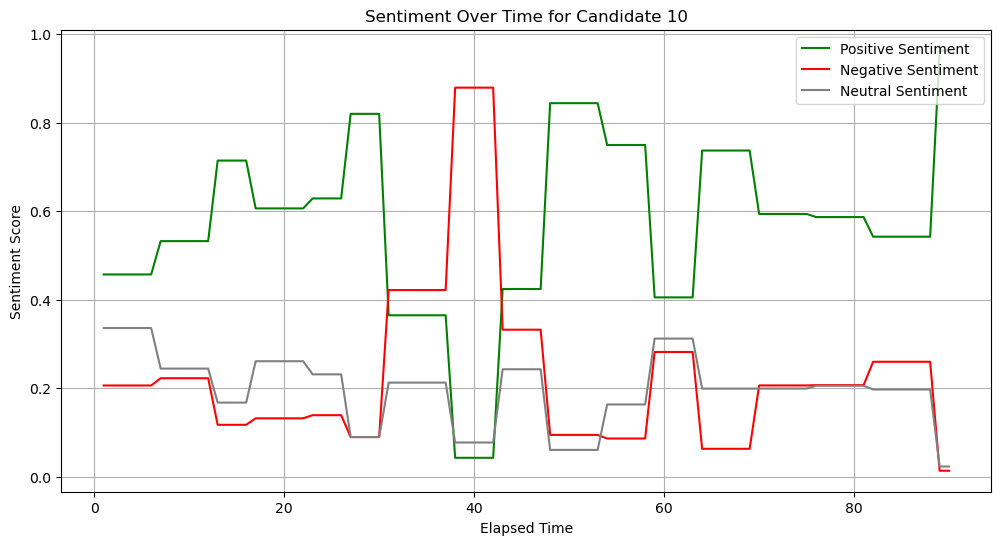

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the file paths for each candidate (adjust according to your file naming convention)
base_path = 'C:/EDA-ibu/emotion_data-20240914T094912Z-001/emotion_data/'  # Base directory path
file_names = ['emotion', 'gaze', 'metadata']  # File types to be loaded for each candidate
base_path_2 = 'C:/EDA-ibu/transcript_data-20240914T075748Z-001/transcript_data/'

# Function to process and visualize data for each candidate
def analyze_candidate_data(candidate_num):
    # Construct the file paths for each candidate
    emotion_file = f"{base_path}{candidate_num}/emotion.csv"
    gaze_file = f"{base_path}{candidate_num}/gaze.csv"
    metadata_file = f"{base_path}{candidate_num}/metadata.csv"
    transcript_file = f"{base_path_2}{candidate_num}.csv"

    # Load the CSV files for the candidate
    emotion_df = pd.read_csv(emotion_file)
    gaze_df = pd.read_csv(gaze_file)
    metadata_df = pd.read_csv(metadata_file)
    transcript_df = pd.read_csv(transcript_file)
    
    if 'start' in transcript_df.columns and 'end' in transcript_df.columns:
        # Perform a time-based alignment between transcript and metadata (emotion/gaze data)
        merged_df = pd.merge_asof(metadata_df.sort_values('elapsed_time'), 
                                  transcript_df.sort_values('start'), 
                                  left_on='elapsed_time', 
                                  right_on='start', 
                                  direction='backward')

        # Now we have merged data based on the closest start time to the elapsed time
        # We can now visualize the relevant metrics.

        # Plot emotions over time
        plt.figure(figsize=(12, 6))
        for emotion in ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']:
            plt.plot(emotion_df['image_seq'], emotion_df[emotion], label=emotion)
        plt.title(f'Emotions Over Time for Candidate {candidate_num}')
        plt.xlabel('Image Sequence')
        plt.ylabel('Emotion Intensity')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()
        
        #Plot Dominant emotion
        
        plt.figure(figsize=(8, 8))
        emotion_df['dominant_emotion'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
        plt.title(f'Dominant Emotion Distribution for Candidate {candidate_num}', fontsize=16)
        plt.ylabel('')  # Hide y-label
        plt.show()

        # Plot communication metrics over time (confidence, hesitance, etc.)
        plt.figure(figsize=(12, 6))
        plt.plot(merged_df['elapsed_time'], merged_df['confident'], label='Confidence', color='green')
        plt.plot(merged_df['elapsed_time'], merged_df['hesitant'], label='Hesitance', color='orange')
        plt.title(f'Confidence and Hesitance Over Time for Candidate {candidate_num}')
        plt.xlabel('Elapsed Time')
        plt.ylabel('Metric Score')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

        # Sentiment and tone analysis
        plt.figure(figsize=(12, 6))
        plt.plot(merged_df['elapsed_time'], merged_df['positive'], label='Positive Sentiment', color='green')
        plt.plot(merged_df['elapsed_time'], merged_df['negative'], label='Negative Sentiment', color='red')
        plt.plot(merged_df['elapsed_time'], merged_df['neutral'], label='Neutral Sentiment', color='gray')
        plt.title(f'Sentiment Over Time for Candidate {candidate_num}')
        plt.xlabel('Elapsed Time')
        plt.ylabel('Sentiment Score')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

    else:
        print(f"Error: 'start' and 'end' columns not found in transcript data for candidate {candidate_num}.")

# Loop through all 10 candidates
for i in range(1, 11):  # Assuming candidates are numbered from 1 to 10
    analyze_candidate_data(i)



    confidence  hesitance  positive_sentiment  emotional_stability  \
6    67.975475  50.974773           71.118230          9951.920071   
4    62.174019  42.954833           65.574828          9320.159082   
5    59.009398  53.851214           63.057273          9287.326428   
8    55.501081  49.237767           60.540213          7607.717655   
2    68.487934  56.384181           72.200636          6163.988848   
3    57.356613  39.599574           56.725685          5926.914628   
9    59.184206  46.126830           61.735264          5486.586302   
1    73.382801  51.482753           70.919907          4422.896609   
7    70.371388  54.293029           71.735390          2536.821136   
10   61.985230  47.936334           58.926690          2296.350252   

    engagement  final_score  
6   100.000000  2045.195257  
4    78.787879  1912.268742  
5   100.000000  1908.549803  
8    94.623656  1569.611817  
2    60.919540  1285.153067  
3    45.000000  1226.354961  
9    96.511628  114

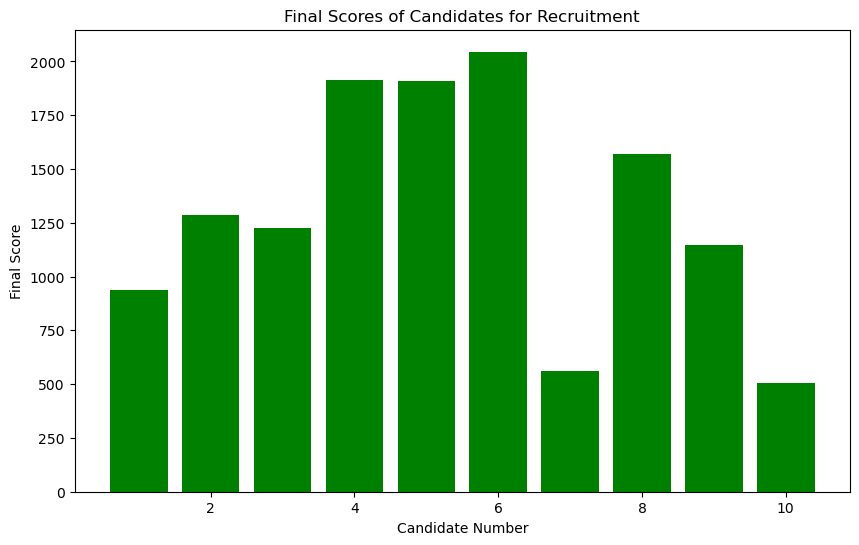

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to store the aggregated scores for each candidate
candidate_scores = {}

# Function to calculate scores for each candidate
def calculate_candidate_scores(candidate_num):
    # Load data files
    # Construct the file paths for each candidate
    emotion_file = f"{base_path}{candidate_num}/emotion.csv"
    gaze_file = f"{base_path}{candidate_num}/gaze.csv"
    metadata_file = f"{base_path}{candidate_num}/metadata.csv"
    transcript_file = f"{base_path_2}{candidate_num}.csv"

    # Load the CSV files for the candidate
    emotion_df = pd.read_csv(emotion_file)
    gaze_df = pd.read_csv(gaze_file)
    metadata_df = pd.read_csv(metadata_file)
    transcript_df = pd.read_csv(transcript_file)

    # Calculate average metrics from transcript data
    avg_confidence = transcript_df['confident'].mean()
    avg_hesitance = transcript_df['hesitant'].mean()
    avg_positive_sentiment = transcript_df['positive'].mean()
    avg_negative_sentiment = transcript_df['negative'].mean()
    avg_neutral_sentiment = transcript_df['neutral'].mean()
    avg_speech_speed = transcript_df['speech_speed'].mean()
    
    # Calculate average gaze and blink from gaze data
    avg_gaze = gaze_df['gaze'].mean()
    avg_blink = gaze_df['blink'].mean()

    # Calculate average emotional stability from emotion data (e.g., neutral and happy states)
    avg_neutral_emotion = emotion_df['neutral'].mean()
    avg_happy_emotion = emotion_df['happy'].mean()

    # Normalize the scores to a common scale (0-100)
    total_confidence = avg_confidence * 100
    total_hesitance = (1 - avg_hesitance) * 100  # Inverse of hesitance
    total_positive_sentiment = avg_positive_sentiment * 100
    total_neutral_sentiment = avg_neutral_sentiment * 100
    total_emotional_stability = avg_neutral_emotion * 100 + avg_happy_emotion * 100
    total_engagement = avg_gaze * 100  # Gaze as engagement indicator

    # Store the scores in the candidate_scores dictionary
    candidate_scores[candidate_num] = {
        'confidence': total_confidence,
        'hesitance': total_hesitance,
        'positive_sentiment': total_positive_sentiment,
        'emotional_stability': total_emotional_stability,
        'engagement': total_engagement
    }

# Loop through all candidates and calculate scores
for i in range(1, 11):  # Assuming 10 candidates
    calculate_candidate_scores(i)

# Convert the dictionary to a DataFrame for easier analysis
candidate_df = pd.DataFrame(candidate_scores).T

# Calculate a final score by averaging or applying weighted sum of key metrics
candidate_df['final_score'] = (candidate_df['confidence'] * 0.3 + 
                               candidate_df['hesitance'] * 0.2 + 
                               candidate_df['positive_sentiment'] * 0.2 + 
                               candidate_df['emotional_stability'] * 0.2 + 
                               candidate_df['engagement'] * 0.1)

# Sort candidates by final score
ranked_candidates = candidate_df.sort_values(by='final_score', ascending=False)

# Display the ranked candidates
print(ranked_candidates)

# Plotting the final scores of candidates for visual comparison
plt.figure(figsize=(10, 6))
plt.bar(ranked_candidates.index, ranked_candidates['final_score'], color='green')
plt.title('Final Scores of Candidates for Recruitment')
plt.xlabel('Candidate Number')
plt.ylabel('Final Score')
plt.show()


In [18]:
def make_recruitment_decision(candidate_num, scores):
    # Define thresholds for key metrics
    confidence_threshold = 70  # High confidence threshold
    hesitance_threshold = 50   # Low hesitance threshold (inverse)
    positive_sentiment_threshold = 60  # High positive sentiment threshold
    emotional_stability_threshold = 65  # Combined emotional stability score threshold
    
    # Extract candidate scores
    confidence = scores['confidence']
    hesitance = scores['hesitance']
    positive_sentiment = scores['positive_sentiment']
    emotional_stability = scores['emotional_stability']
    engagement = scores['engagement']

    # Recruitment decision logic
    if confidence > confidence_threshold and hesitance > hesitance_threshold and \
       positive_sentiment > positive_sentiment_threshold and emotional_stability > emotional_stability_threshold:
        return f"Candidate {candidate_num} is recommended for recruitment."
    else:
        return f"Candidate {candidate_num} may not recommended for recruitment due to insufficient scores in communication or emotional stability."

# Make decisions for all candidates
for i in range(1, 11):
  decision = make_recruitment_decision(i, candidate_scores[i])
  print(decision)

Candidate 1 is recommended for recruitment.
Candidate 2 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 3 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 4 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 5 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 6 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 7 is recommended for recruitment.
Candidate 8 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 9 may not recommended for recruitment due to insufficient scores in communication or emotional stability.
Candidate 10 may not recommended for recruitment due to insufficient scores in communication or emot

In [17]:
def analyze_communication(candidate_num, scores):
    communication_report = f"Candidate {candidate_num} Communication Skills:\n"
    
    # Analyze confidence
    if scores['confidence'] > 75:
        communication_report += "- Strong confidence in communication.\n"
    elif scores['confidence'] < 50:
        communication_report += "- Needs improvement in confidence.\n"
    
    # Analyze hesitance
    if scores['hesitance'] > 70:
        communication_report += "- Shows smooth and fluent communication.\n"
    else:
        communication_report += "- Exhibits signs of hesitation while speaking.\n"
    
    # Analyze sentiment (check if 'negative' column exists)
    if 'negative_sentiment' in scores:
        if scores['positive_sentiment'] > 60:
            communication_report += "- Displays a positive and engaging tone.\n"
        elif scores['negative_sentiment'] > 40:
            communication_report += "- Shows a negative tone; may need improvement in attitude.\n"
    else:
        # If 'negative_sentiment' does not exist, only check positive sentiment
        if scores['positive_sentiment'] > 60:
            communication_report += "- Displays a positive and engaging tone.\n"
        else:
            communication_report += "- Sentiment analysis data is incomplete; positive sentiment could be improved.\n"
    
    return communication_report

# Analyze communication for all candidates
for i in range(1, 11):
    communication_analysis = analyze_communication(i, candidate_scores[i])
    print(communication_analysis)


Candidate 1 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positive and engaging tone.

Candidate 2 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positive and engaging tone.

Candidate 3 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Sentiment analysis data is incomplete; positive sentiment could be improved.

Candidate 4 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positive and engaging tone.

Candidate 5 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positive and engaging tone.

Candidate 6 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positive and engaging tone.

Candidate 7 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positive and engaging tone.

Candidate 8 Communication Skills:
- Exhibits signs of hesitation while speaking.
- Displays a positiv

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rteja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


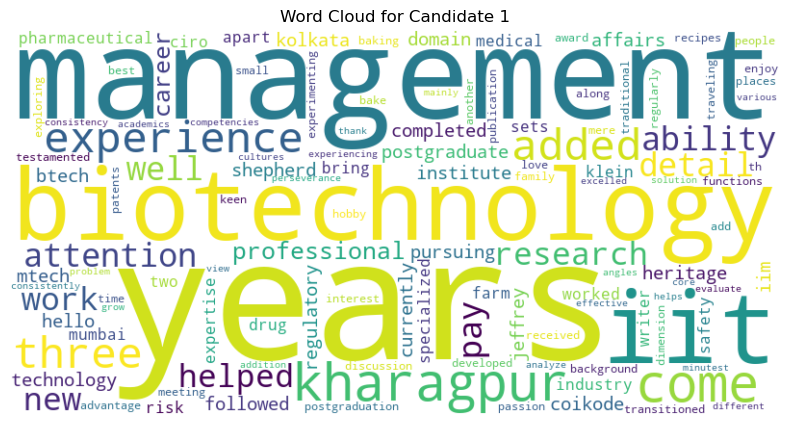

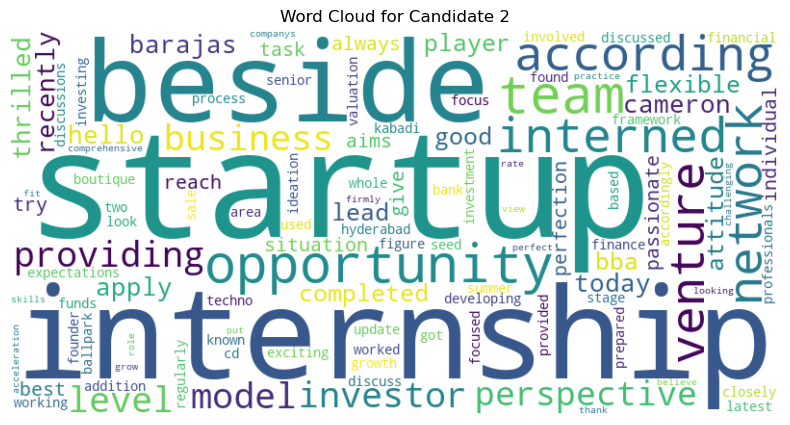

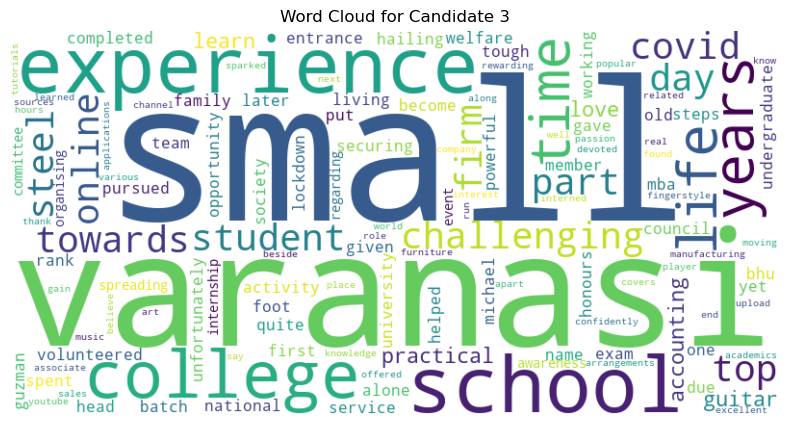

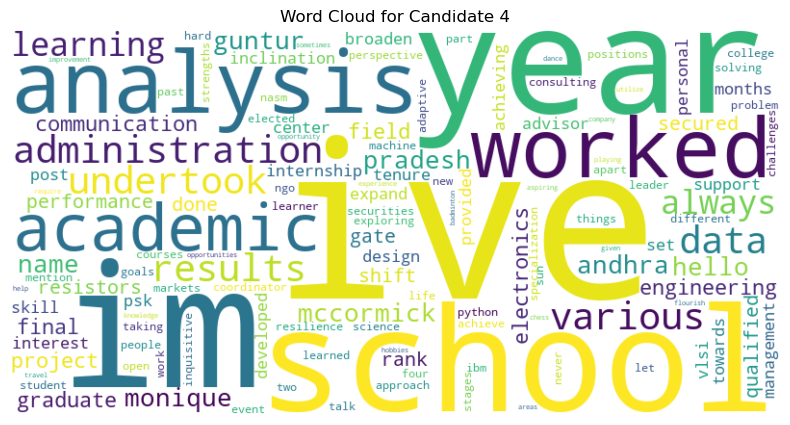

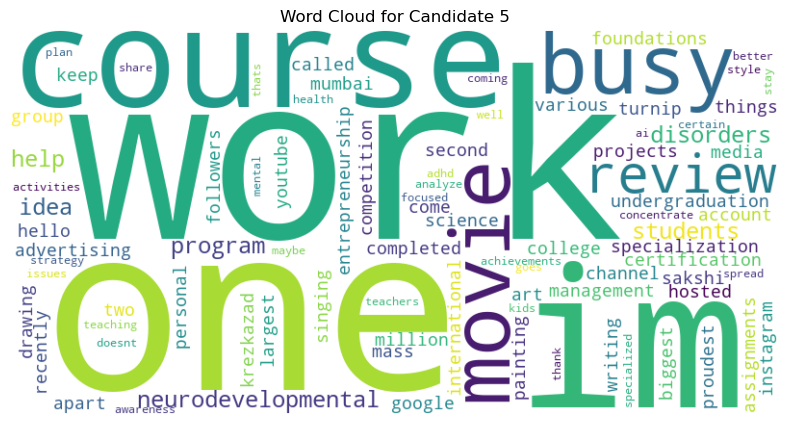

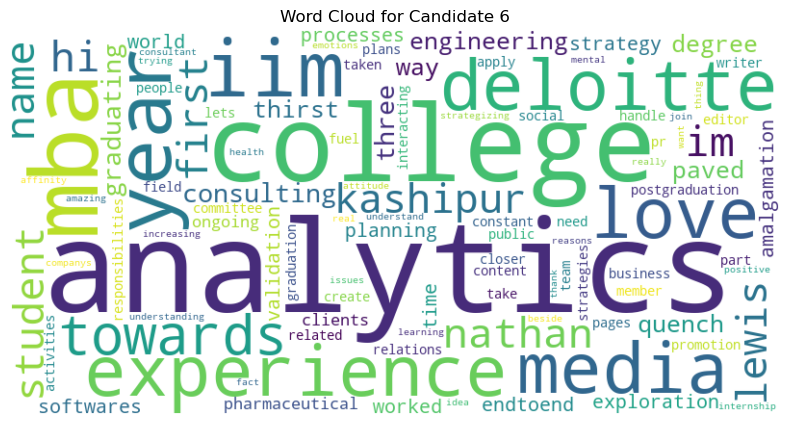

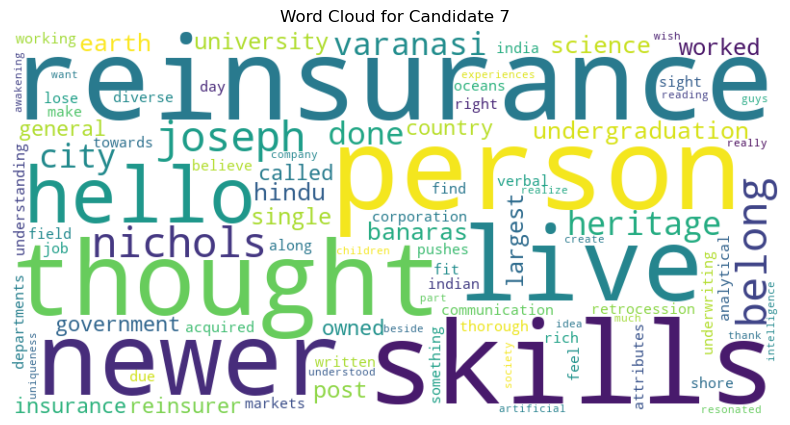

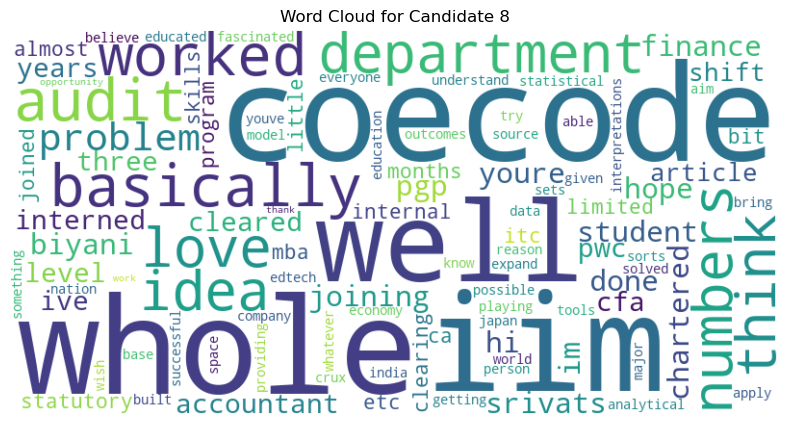

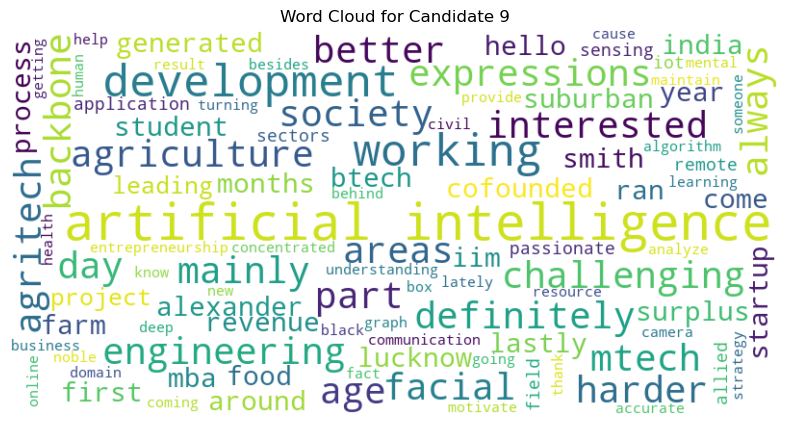

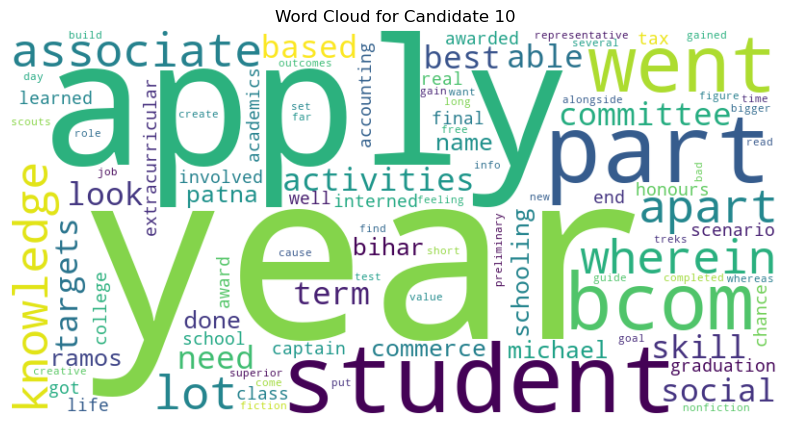

In [2]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Folder where all transcript files are located
folder_path = r'C:/EDA-ibu/transcripts-20240914T103931Z-001/transcripts'

# Function to preprocess text (convert to lowercase, remove punctuation, etc.)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Loop through files from 1.txt to 10.txt and generate word clouds
for i in range(1, 11):  # For 10 candidates (1 to 10)
    file_name = f"{i}.txt"  # File name for each candidate
    file_path = os.path.join(folder_path, file_name)
    
    # Open and read the file
    with open(file_path, 'r') as file:
        text = file.read()
        
        # Preprocess the text
        cleaned_text = preprocess_text(text)
        
        # Remove stopwords
        filtered_words = [word for word in cleaned_text.split() if word not in stop_words]
        
        # Create the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
        
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide axes
        plt.title(f"Word Cloud for Candidate {i}")
        plt.show()
